2440010441
Stefan Senjaya
LC02


Objective: Determining the weather code

Data set: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset

**1a. Describe why this objective is suited to this data?**

I believe the objective is suited to this data because things like the temperature and the humidity of the time might influence the weather code.


**b. Determine what kind of machine learning approach that can be used to 
solve this problem and explain why**

I believe this objective can be solved using classification. Our objective is to classify what weather code might be appropriate when given the row of data. The weather code itself is categorical in nature and is not a "scale" although codes 1-10 might be interpreted as such, there also exists code 26 and 94 for snowfalls and freezing fog respectively. Classification can be done using a variety of techniques but I will use kNN.

**c. Show the selected variables that are related to the chosen task and give 
some explanation on it (which one is discrete or continuous random variables) bold text**

The variables that might be related to the variable we are trying to classify are:

- Bike Count: Discrete variable, the variable is counted based on how many new bike shares happened at that time. Given the condition of the weather, bike shares might fluctuate.

- Humidity: Continous variable, humidity is measured and can be compared, 89% is less humid than 93% for example.

- Wind speed: Continous variable, a measured variable, expressed in km/hour.

**d. Find the expected value from one of the selected variables.**


Importing libraries

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier

Loading and profiling the data

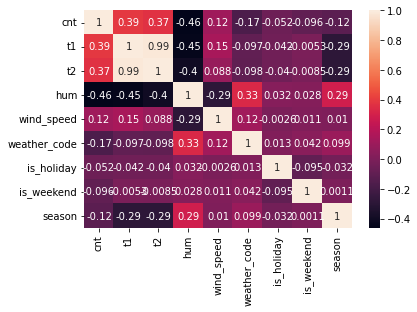

In [3]:
bikeData = pd.read_csv("london_merged.csv")
corr_matrix = bikeData.corr()
sb.heatmap(data=corr_matrix, annot=True)
plt.show()

From the correlation matrix above we can infer that the variable that has the most effect to weather_code is humidity.

Selecting the columns

In [4]:
bikeShares = bikeData[["hum", "weather_code"]]

print(bikeShares.head)

<bound method NDFrame.head of          hum  weather_code
0       93.0           3.0
1       93.0           1.0
2       96.5           1.0
3      100.0           1.0
4       93.0           1.0
...      ...           ...
17409   81.0           3.0
17410   81.0           4.0
17411   78.5           4.0
17412   76.0           4.0
17413   76.0           2.0

[17414 rows x 2 columns]>


Splitting up the train and testing data

In [5]:
train, test = train_test_split(bikeShares, test_size=0.2)

Training the model

In [6]:
KNN = KNeighborsClassifier(n_neighbors = 3).fit(train[["hum"]], train["weather_code"])

Getting the expected values

In [7]:
classification = KNN.predict(test[["hum"]])
for i in range(len(test)):
  print(test.values[i] , classification[i])

accuracy = accuracy_score(test["weather_code"], classification)
MAE = mean_absolute_error(test["weather_code"], classification)
MSE = mean_squared_error(test["weather_code"], classification)

print(" ACC : ", accuracy)
print(" MAE : ", MAE)
print(" MSE : ", MSE)

[69.5  1. ] 2.0
[72.  3.] 1.0
[82.  1.] 3.0
[55.  2.] 1.0
[64.  1.] 1.0
[59.  2.] 1.0
[74.5  2. ] 2.0
[57.5  1. ] 1.0
[71.  1.] 1.0
[44.5  1. ] 2.0
[68.5  1. ] 1.0
[74.5  1. ] 2.0
[72.  1.] 1.0
[65.5  2. ] 1.0
[78.  1.] 3.0
[78.  7.] 3.0
[87.  1.] 4.0
[72.  4.] 1.0
[74.  2.] 1.0
[56.  2.] 1.0
[84.5  2. ] 1.0
[81. 26.] 1.0
[84.  1.] 1.0
[75.  1.] 1.0
[73.5  2. ] 3.0
[63.  4.] 3.0
[45.5  2. ] 2.0
[63.5  1. ] 2.0
[96.5  1. ] 4.0
[82.  7.] 3.0
[88.  4.] 3.0
[39.  1.] 1.0
[74.5  2. ] 2.0
[68.5  2. ] 1.0
[62.  2.] 1.0
[57.  2.] 1.0
[88.  4.] 3.0
[77.  2.] 1.0
[91.  7.] 3.0
[88.  1.] 3.0
[88.  3.] 3.0
[59.  1.] 1.0
[94.  3.] 2.0
[60.  2.] 1.0
[87.  1.] 4.0
[51.  2.] 1.0
[60.  2.] 1.0
[88.  3.] 3.0
[74.5  7. ] 2.0
[63.5  1. ] 2.0
[66.  1.] 1.0
[72.5  1. ] 3.0
[76.  1.] 1.0
[62.  2.] 1.0
[82.  2.] 3.0
[62.  1.] 1.0
[72.  1.] 1.0
[87.  1.] 4.0
[72.  1.] 1.0
[71.  1.] 1.0
[71.  2.] 1.0
[50.5  1. ] 2.0
[55.5  2. ] 2.0
[44.  1.] 1.0
[61.  3.] 2.0
[49.  1.] 1.0
[88.  4.] 3.0
[73.  2.] 2.0
[73.  2.] 

**2. By using the Linear Regression method, please predict the number of bike sharing in the dataset. Don’t forget to split the data into train and test data to evaluate the 
model performance. Then, please give some justification bout the performance of this model
and some explanations for every step that has been performed to build this model.**


Importing libraries

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Referring to the correlation matrix that was done in the previous number, even though t2 has a relatively high correlation value, the column was not used because as the description of the dataset said it was only the "feels-like" value when t1 (the real is measured temperature) is also used.

Selecting columns

In [9]:
x = bikeData[["t1", "hum", "wind_speed", "weather_code", "is_holiday", "is_weekend", "season"]]
y = bikeData[["cnt"]]

Training and test data splitting

In [10]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

Regression model training

In [11]:
LRM = LinearRegression().fit(xTrain, yTrain)
print('Theta 0: ', LRM.coef_)
print('Theta 1: ', LRM.intercept_)

Theta 0:  [[  46.50521394  -28.20637434   -3.09899829  -11.41272894 -260.06082306
  -213.71793751   58.88859916]]
Theta 1:  [2661.97955926]


Predicting using the built model

In [12]:
prediction = LRM.predict(xTest)
for i in range(len(xTest)):
  print(xTest.values[i], prediction[i])

[ 2. 60. 11.  1.  0.  1.  2.] [921.16507712]
[16.5 80.  23.   4.   0.   1.   1. ] [901.04842692]
[17. 77. 16.  4.  0.  0.  1.] [1244.33108247]
[15. 88.  8.  4.  1.  0.  1.] [605.78170006]
[ 8. 87. 18.  3.  0.  1.  3.] [452.9944067]
[13. 94. 12.  4.  0.  0.  3.] [708.97505432]
[ 5. 81. 25.  7.  0.  1.  3.] [415.37310714]
[14. 65. 35.  3.  0.  0.  3.] [1513.6008925]
[10.  74.  18.5  7.   0.   0.   0. ] [902.53942619]
[ 8.5 93.5 10.   3.   0.   0.   0. ] [354.74970679]
[ 7.5 73.5 19.5  3.   0.   0.   0. ] [842.93149598]
[22.5 53.5 20.5  1.   0.   1.   1. ] [1969.53431327]
[23.  51.5 16.   2.   0.   0.   1. ] [2265.45036981]
[13. 67. 29.  3.  0.  0.  3.] [1429.27691962]
[12.5 79.5 16.   3.   1.   0.   0. ] [657.00499058]
[26.5 58.  13.   1.   0.   0.   1. ] [2265.58690918]
[ 1.5 87.   8.   1.   0.   1.   0. ] [27.86015939]
[15.  49.5 14.   2.   0.   0.   0. ] [1897.13080437]
[11.  79.5 17.   1.   0.   1.   3. ] [829.9823123]
[13. 94. 20.  3.  0.  0.  2.] [636.70719777]
[ 5. 90. 17.  7.  0.

Evaluating the model

In [13]:
print("R2 Score : ", r2_score(yTest, prediction))
print("MAE      : ", mean_absolute_error(yTest, prediction))
print("MSE      : ", mean_squared_error(yTest, prediction))

R2 Score :  0.2673261997039844
MAE      :  676.6191681302603
MSE      :  821176.5678592585


From the above values we can conclude that the model is not accurate enough to be used. A possible explanation is that there is simply too many variables to consider with too little correlation for the cnt attribute.

**3. By using the Ridge Regression method, please predict the number of bike sharing in the dataset. Don’t forget to split the data into train and test data to evaluate the 
model performance. Then, please give some justification bout the performance of this model 
and some explanations for every step that has been performed to build this model.**

Importing ridge regression library

In [14]:
from sklearn.linear_model import Ridge

Training ridge regression

In [15]:
ridge = Ridge(alpha=0.01)
ridge.fit(xTrain, yTrain)

print('Theta 0: ', ridge.coef_)
print('Theta 1: ', ridge.intercept_)

Theta 0:  [[  46.50522134  -28.20637717   -3.09900084  -11.41273584 -260.05177978
  -213.71690048   58.88862061]]
Theta 1:  [2661.97920767]


Predicting using the ridge model

In [16]:
predictionRidge = ridge.predict(xTest)
for i in range(len(xTest)):
  print(xTest.values[i] ,predictionRidge[i])

[ 2. 60. 11.  1.  0.  1.  2.] [921.1656156]
[16.5 80.  23.   4.   0.   1.   1. ] [901.04894335]
[17. 77. 16.  4.  0.  0.  1.] [1244.33059188]
[15. 88.  8.  4.  1.  0.  1.] [605.79022721]
[ 8. 87. 18.  3.  0.  1.  3.] [452.99490301]
[13. 94. 12.  4.  0.  0.  3.] [708.97453913]
[ 5. 81. 25.  7.  0.  1.  3.] [415.37355283]
[14. 65. 35.  3.  0.  0.  3.] [1513.60041511]
[10.  74.  18.5  7.   0.   0.   0. ] [902.53884383]
[ 8.5 93.5 10.   3.   0.   0.   0. ] [354.74910739]
[ 7.5 73.5 19.5  3.   0.   0.   0. ] [842.93092159]
[22.5 53.5 20.5  1.   0.   1.   1. ] [1969.53497608]
[23.  51.5 16.   2.   0.   0.   1. ] [2265.45000951]
[13. 67. 29.  3.  0.  0.  3.] [1429.27644444]
[12.5 79.5 16.   3.   1.   0.   0. ] [657.01348838]
[26.5 58.  13.   1.   0.   0.   1. ] [2265.5865709]
[ 1.5 87.   8.   1.   0.   1.   0. ] [27.86058253]
[15.  49.5 14.   2.   0.   0.   0. ] [1897.13037423]
[11.  79.5 17.   1.   0.   1.   3. ] [829.98286833]
[13. 94. 20.  3.  0.  0.  2.] [636.70664767]
[ 5. 90. 17.  7.  0

In [17]:
print("R2 Score : ", r2_score(yTest, predictionRidge))
print("Error    : ", mean_squared_error(yTest, predictionRidge))

R2 Score :  0.2673261976780382
Error    :  821176.5701299274


Utilizing ridge regression instead of linear regression found that the model without changing anything e.g the variables that are considered only gives a marginal improvement to the r2 score. The model is still not viable given this miniscule improvement, although there is a method to find the optimal alpha for the ridge regression, improvement will not likely not improve to the point of making it a viable model which requires an r2 score of around 0.7.

**4. Please discuss the comparison between models from no.2 and no.3**

Models from linear regression and ridge regression only differ in that ridge regression comes with a regularization system that utilizes the alpha variable. This helps with overfitting issues, however the main indicator of overfitting that is high accuracy with low variance is not present in the model, as such the difference is barely noticeable. 